In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

In [30]:
df = pd.read_csv("D:\\econometrics\\train.csv")
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [32]:
df.Alley.fillna(0,inplace = True)
df.MiscFeature.fillna(0,inplace = True)
df.Fence.fillna(0,inplace = True)
df.PoolQC.fillna(0, inplace = True)
df.GarageCond.fillna(0,inplace = True)
df.GarageQual.fillna(0, inplace = True)
df.GarageType.fillna(0, inplace = True)
df.GarageYrBlt.fillna(0,inplace = True)
df.GarageFinish.fillna(0,inplace = True)
df.FireplaceQu.fillna(0,inplace = True)
df.Electrical.fillna(0,inplace = True)
df['BsmtCond']=df['BsmtCond'].fillna(0)
df['BsmtQual']=df['BsmtQual'].fillna(0)
df.BsmtFinType2.fillna(0,inplace = True)
df.BsmtFinType1.fillna(0,inplace = True)
df.BsmtExposure.fillna(0,inplace = True)
df['MasVnrType']=df['MasVnrType'].fillna(0)
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [33]:
#df['yearslastsold']= 2020- df['YrSold']
#df['Age']= 2020 - df['YearBuilt']
#df['last_remod'] = 2020-df['YearRemodAdd']
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
#df['GarageBuilt'] = 2020 - df['GarageYrBlt']
#df = df.drop(['YearRemodAdd','YearBuilt','YrSold'],axis = 1)

In [34]:
X_train.Exterior2nd.unique()

array([ 1,  4,  3,  6,  2,  5, 10,  7,  9, 12,  8, 13, 11, 14, 15, 16],
      dtype=int64)

In [35]:
df.MSSubClass=df.MSSubClass.map({60:6,  20:1,  70:7,  50:5, 190:15,  45:4,  90:11, 120:12,  30:2,  85:10,  80:9, 160:13,  75:8,180:14,  40:3})
df.MSZoning=df.MSZoning.map({'RL':1, 'RM':2, 'C (all)':3, 'FV':4, 'RH':5})
df.LotShape=df.LotShape.map({'IR3':1,'IR2':2, 'IR1':3,'Reg':4})
df.Street=df.Street.map({'Pave':2, 'Grvl':1,0:0})
df.LandContour=df.LandContour.map({'Lvl':1, 'Bnk':2,'Low':3, 'HLS':4 })
df.Alley = df.Alley.map({'Grvl': 1, 'Pave' : 2,0:0})
df.Utilities=df.Utilities.map({'NoSeWa':1, 'AllPub' :2 })
df.LotConfig=df.LotConfig.map({'Inside':1,'Corner':2, 'CulDSac':3, 'FR2':4 , 'FR3':5})
df.LandSlope=df.LandSlope.map({'Sev':1,'Mod':2, 'Gtl':3 })
df.Neighborhood=df.Neighborhood.map({'CollgCr': 1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,  'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11,  'NAmes':12, 'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18, 'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24, 'Blueste':25})
df.Condition1=df.Condition1.map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9})
df.Condition2=df.Condition2.map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9})
df.BldgType=df.BldgType.map({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})
df.RoofStyle=df.RoofStyle.map({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6})
df.RoofMatl=df.RoofMatl.map({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,'Roll':7, 'ClyTile':8})
df.Exterior1st=df.Exterior1st.map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,'Stone':13, 'ImStucc':14, 'CBlock':15})
df.Exterior2nd=df.Exterior2nd.map({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,'AsphShn':13, 'Stone':14,'CBlock':16, 'Other':15})
df.MasVnrType=df.MasVnrType.map({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4, 'nan':5})
df.ExterQual=df.ExterQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2})
df.ExterCond=df.ExterCond.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})
df.Foundation=df.Foundation.map({'PConc':4, 'CBlock':3, 'BrkTil':2, 'Wood':1, 'Slab':5, 'Stone':6})
df.BsmtQual=df.BsmtQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 0:1})
df.BsmtCond=df.BsmtCond.map({'TA':3, 'Gd':4, 0:0, 'Fa':2, 'Po':1})
df.BsmtExposure=df.BsmtExposure.map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 0:0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':5, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 0:0, 'LwQ':2})
df.BsmtFinType2=df.BsmtFinType2.map({'GLQ':5, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 0:0, 'LwQ':2})
df.Heating=df.Heating.map({'GasA':6, 'GasW':5, 'Grav':3, 'Wall':4, 'OthW':1, 'Floor':2})
df.HeatingQC=df.HeatingQC.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})
df.CentralAir=df.CentralAir.map({'Y':2, 'N':1})
df.Electrical=df.Electrical.map({'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1, 0:0})
df.KitchenQual=df.KitchenQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2})
df.Functional=df.Functional.map({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2})
df.FireplaceQu=df.FireplaceQu.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.GarageType=df.GarageType.map({'Attchd':5, 'Detchd':1, 'BuiltIn':3, 'CarPort':2, 0:0, 'Basment':4, '2Types':6})
df.GarageFinish=df.GarageFinish.map({'RFn':2, 'Unf':1, 'Fin':3, 0:0})
df.GarageQual=df.GarageQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.GarageCond=df.GarageCond.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.PavedDrive=df.PavedDrive.map({'Y':3, 'N':1, 'P':2})
df.PoolQC=df.PoolQC.map({0:0, 'Ex':5, 'Fa':2, 'Gd':4})
df.Fence=df.Fence.map({0:0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1})
df.MiscFeature=df.MiscFeature.map({0:0, 'Shed':2, 'Gar2':3, 'Othr':1, 'TenC':4})
df.SaleType=df.SaleType.map({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9})
df.SaleCondition=df.SaleCondition.map({'Normal':3, 'Abnorml':2, 'Partial':1, 'AdjLand':4, 'Alloca':5, 'Family':6})
df.HouseStyle =df.HouseStyle.map({'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7, 'SLvl':8, '2.5Unf':5,'2.5Fin':6})

In [36]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
y = df.SalePrice
X = df.drop(['Id','SalePrice','MasVnrType'],axis =1)

In [57]:
X.column

(1460, 78)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
pd.set_option('display.max_rows',X.shape[0]+1)

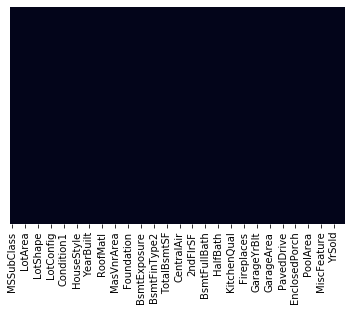

In [40]:
sns.heatmap(X.isnull(),yticklabels=False, cbar=False)

In [41]:
#linear regression
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred= lmodel.predict(X_test)

In [43]:
(y_pred== y_test).sum()

0

In [44]:
from sklearn.linear_model import LogisticRegression
trreg = LogisticRegression()
trreg.fit(X_train,y_train)
y_pred= trreg.predict(X_test)
(y_pred== y_test).sum()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0

In [45]:
from xgboost import XGBRFRegressor
xgreg = XGBRFRegressor()
xgreg.fit(X_train,y_train)
xgy_pred= xgreg.predict(X_test)
(xgy_pred== y_test).sum()

0

In [46]:
df= pd.read_csv("D:\\econometrics\\test.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [47]:
id_test = df.Id

In [50]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [49]:
df.fillna(0,inplace = True)

In [54]:
df = df.drop(['Id','Exterior2nd','MasVnrType'],axis =1)

In [65]:
df.MSSubClass=df.MSSubClass.map({60:6,  20:1,  70:7,  50:5, 190:15,  45:4,  90:11, 120:12,  30:2,  85:10,  80:9, 160:13,  75:8,180:14,  40:3})
df.MSZoning=df.MSZoning.map({'RL':1, 'RM':2, 'C (all)':3, 'FV':4, 'RH':5})
df.LotShape=df.LotShape.map({'IR3':1,'IR2':2, 'IR1':3,'Reg':4})
df.Street=df.Street.map({'Pave':2, 'Grvl':1,0:0})
df.LandContour=df.LandContour.map({'Lvl':1, 'Bnk':2,'Low':3, 'HLS':4 })
df.Alley = df.Alley.map({'Grvl': 1, 'Pave' : 2,0:0})
df.Utilities=df.Utilities.map({'NoSeWa':1, 'AllPub' :2 })
df.LotConfig=df.LotConfig.map({'Inside':1,'Corner':2, 'CulDSac':3, 'FR2':4 , 'FR3':5})
df.LandSlope=df.LandSlope.map({'Sev':1,'Mod':2, 'Gtl':3 })
df.Neighborhood=df.Neighborhood.map({'CollgCr': 1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,  'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11,  'NAmes':12, 'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18, 'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24, 'Blueste':25})
df.Condition1=df.Condition1.map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9})
df.Condition2=df.Condition2.map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9})
df.BldgType=df.BldgType.map({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})
df.RoofStyle=df.RoofStyle.map({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6})
df.RoofMatl=df.RoofMatl.map({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,'Roll':7, 'ClyTile':8})
df.Exterior1st=df.Exterior1st.map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,'Stone':13, 'ImStucc':14, 'CBlock':15})
df.Exterior2nd=df.Exterior2nd.map({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,'AsphShn':13, 'Stone':14,'CBlock':16, 'Other':15})
#df.MasVnrType=df.MasVnrType.map({'BrkFace':1, 'None':4, 'Stone':2, 'BrkCmn':3, 'nan':0})
df.ExterQual=df.ExterQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2})
df.ExterCond=df.ExterCond.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})
df.Foundation=df.Foundation.map({'PConc':4, 'CBlock':3, 'BrkTil':2, 'Wood':1, 'Slab':5, 'Stone':6})
df.BsmtQual=df.BsmtQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 0:1})
df.BsmtCond=df.BsmtCond.map({'TA':3, 'Gd':4, 0:0, 'Fa':2, 'Po':1})
df.BsmtExposure=df.BsmtExposure.map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 0:0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':5, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 0:0, 'LwQ':2})
df.BsmtFinType2=df.BsmtFinType2.map({'GLQ':5, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 0:0, 'LwQ':2})
df.Heating=df.Heating.map({'GasA':6, 'GasW':5, 'Grav':3, 'Wall':4, 'OthW':1, 'Floor':2})
df.HeatingQC=df.HeatingQC.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})
df.CentralAir=df.CentralAir.map({'Y':2, 'N':1})
df.Electrical=df.Electrical.map({'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1, 0:0})
df.KitchenQual=df.KitchenQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2})
df.Functional=df.Functional.map({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2})
df.FireplaceQu=df.FireplaceQu.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.GarageType=df.GarageType.map({'Attchd':5, 'Detchd':1, 'BuiltIn':3, 'CarPort':2, 0:0, 'Basment':4, '2Types':6})
df.GarageFinish=df.GarageFinish.map({'RFn':2, 'Unf':1, 'Fin':3, 0:0})
df.GarageQual=df.GarageQual.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.GarageCond=df.GarageCond.map({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1, 0:0})
df.PavedDrive=df.PavedDrive.map({'Y':3, 'N':1, 'P':2})
df.PoolQC=df.PoolQC.map({0:0, 'Ex':5, 'Fa':2, 'Gd':4})
df.Fence=df.Fence.map({0:0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1})
df.MiscFeature=df.MiscFeature.map({0:0, 'Shed':2, 'Gar2':3, 'Othr':1, 'TenC':4})
df.SaleType=df.SaleType.map({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9})
df.SaleCondition=df.SaleCondition.map({'Normal':3, 'Abnorml':2, 'Partial':1, 'AdjLand':4, 'Alloca':5, 'Family':6})
df.HouseStyle =df.HouseStyle.map({'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7, 'SLvl':8, '2.5Unf':5,'2.5Fin':6})

In [55]:
df = df.drop(['Id'], axis = 1)

In [59]:
df =df.drop(['MasVnrType'], axis =1)

In [60]:
X = df

In [64]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,5.0,80.0,11622,2,0,4,1,2.0,1,...,120,0,0,3,0,0,6,2010,1.0,3
1,1.0,1.0,81.0,14267,2,0,3,1,2.0,2,...,0,0,0,0,3,12500,6,2010,1.0,3
2,6.0,1.0,74.0,13830,2,0,3,1,2.0,1,...,0,0,0,3,0,0,3,2010,1.0,3
3,6.0,1.0,78.0,9978,2,0,3,1,2.0,1,...,0,0,0,0,0,0,6,2010,1.0,3
4,12.0,1.0,43.0,5005,2,0,3,4,2.0,1,...,144,0,0,0,0,0,1,2010,1.0,3
5,6.0,1.0,75.0,10000,2,0,3,1,2.0,2,...,0,0,0,0,0,0,4,2010,1.0,3
6,1.0,1.0,0.0,7980,2,0,3,1,2.0,1,...,0,0,0,4,2,500,3,2010,1.0,3
7,6.0,1.0,63.0,8402,2,0,3,1,2.0,1,...,0,0,0,0,0,0,5,2010,1.0,3
8,1.0,1.0,85.0,10176,2,0,4,1,2.0,1,...,0,0,0,0,0,0,2,2010,1.0,3
9,1.0,1.0,70.0,8400,2,0,4,1,2.0,2,...,0,0,0,3,0,0,4,2010,1.0,3


In [66]:
xrcol = xgreg.predict(X)

In [69]:
rcol = xrcol.reshape(-1,1)

In [71]:
lcol = pd.DataFrame(data=id_test,columns=['Id'])

In [72]:
rcol =pd.DataFrame(data=rcol,columns=['SalePrice'])

In [73]:
submit = pd.concat([lcol,rcol],
    axis=1,
    join='inner',
    join_axes=None,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    sort=None,
    copy=True,
)

In [75]:
submit.to_csv('Desktop/xgsales.csv')